## Import libs

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from wordcloud import WordCloud
import pickle

#### Load dữ liệu đã tiền xử lý

In [25]:
train_x = pickle.load(open('Data/saved/train_x.sav', 'rb'))
train_y = pickle.load(open('Data/saved/train_y.sav', 'rb'))
test_x = pickle.load(open('Data/saved/test_x.sav', 'rb'))
test_y = pickle.load(open('Data/saved/test_y.sav', 'rb'))

#### Dữ liệu chưa xử lý
![dataset_before_preprocess](image/dataset_before_preprocess.png)

#### Dữ liệu đã qua xử lý

In [3]:
# Tính độ dài trung bình của tập dữ liệu
def sentence_len(text):
    return len(text.split(" "))

new_data_sizes = []

for content in train_x:
    new_data_sizes.append(sentence_len(content))

print('Độ dài trung bình:', np.mean(new_data_sizes))

Độ dài trung bình: 268.1029673854928


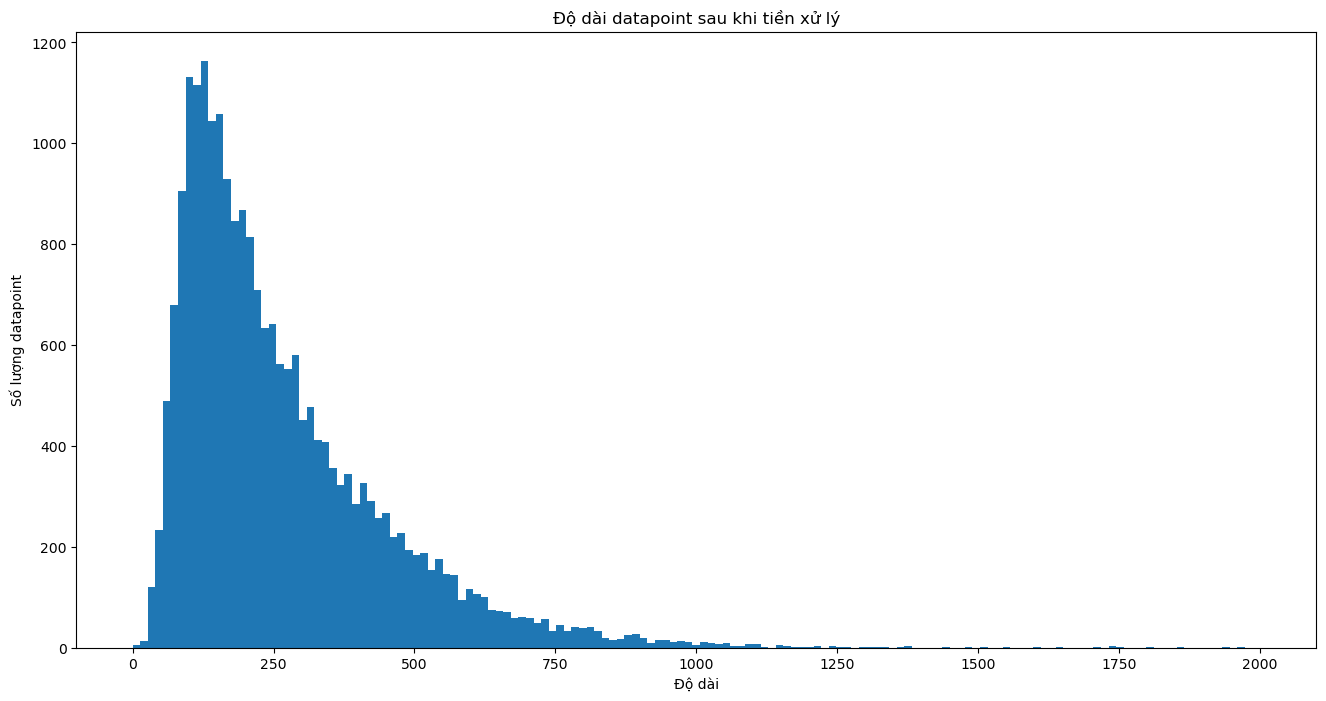

In [4]:
# vẽ histogram cho dataset
plt.figure(figsize=(16, 8))
plt.title("Độ dài datapoint sau khi tiền xử lý")
plt.xlabel('Độ dài')
plt.ylabel('Số lượng datapoint')
plt.hist(np.array(new_data_sizes), bins=int(math.sqrt(len(new_data_sizes))), range=(0, 2000))
plt.savefig('image/dataset_after_preprocess.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

Như vậy, phần lớn datapoint bây giờ chỉ có độ dài không quá 1500 từ và độ dài trung bình cho mỗi mẫu cũng đã giảm xuống khoảng 1 nửa.

# Phân tích dữ liệu

Số lượng dữ liệu các nhãn

### Phân bố của các nhãn trên tập dữ liệu

In [9]:
labels = list(np.unique(train_y))
print('Số lượng nhãn:', len(labels))
labels

Số lượng nhãn: 30


['Am nhac',
 'Am thuc',
 'Bat dong san',
 'Bong da',
 'Chung khoan',
 'Cum ga',
 'Cuoc song do day',
 'Du hoc',
 'Du lich',
 'Duong vao WTO',
 'Gia dinh',
 'Giai tri tin hoc',
 'Giao duc',
 'Gioi tinh',
 'Hackers va Virus',
 'Hinh su',
 'Khong gian song',
 'Kinh doanh quoc te',
 'Kinh te',
 'Lam dep',
 'Loi song',
 'Mua sam',
 'My thuat',
 'San khau dien anh',
 'San pham tin hoc moi',
 'Suc khoe',
 'Tennis',
 'The gioi tre',
 'Thoi trang',
 'Xe co']

In [23]:
print('Train:')
count = 0
for label in labels:
    print(f'{label}: {np.count_nonzero(train_y == label)}')
    count += np.count_nonzero(train_y == label)
print(f'Total: {count}')


print('Test:')
count = 0
for label in labels:
    print(f'{label}: {np.count_nonzero(test_y == label)}')
    count += np.count_nonzero(test_y == label)
print(f'Total: {count}')

Train:
Am nhac: 1296
Am thuc: 528
Bat dong san: 458
Bong da: 2567
Chung khoan: 513
Cum ga: 661
Cuoc song do day: 1174
Du hoc: 765
Du lich: 1102
Duong vao WTO: 289
Gia dinh: 375
Giai tri tin hoc: 1328
Giao duc: 1348
Gioi tinh: 446
Hackers va Virus: 489
Hinh su: 395
Khong gian song: 150
Kinh doanh quoc te: 985
Kinh te: 540
Lam dep: 1077
Loi song: 425
Mua sam: 206
My thuat: 259
San khau dien anh: 1667
San pham tin hoc moi: 1093
Suc khoe: 165
Tennis: 630
The gioi tre: 759
Thoi trang: 542
Xe co: 212
Total: 22444
Test:
Am nhac: 555
Am thuc: 227
Bat dong san: 196
Bong da: 1100
Chung khoan: 220
Cum ga: 283
Cuoc song do day: 504
Du hoc: 328
Du lich: 473
Duong vao WTO: 124
Gia dinh: 161
Giai tri tin hoc: 570
Giao duc: 578
Gioi tinh: 191
Hackers va Virus: 209
Hinh su: 169
Khong gian song: 64
Kinh doanh quoc te: 422
Kinh te: 231
Lam dep: 461
Loi song: 182
Mua sam: 88
My thuat: 111
San khau dien anh: 715
San pham tin hoc moi: 469
Suc khoe: 71
Tennis: 270
The gioi tre: 325
Thoi trang: 232
Xe co: 91


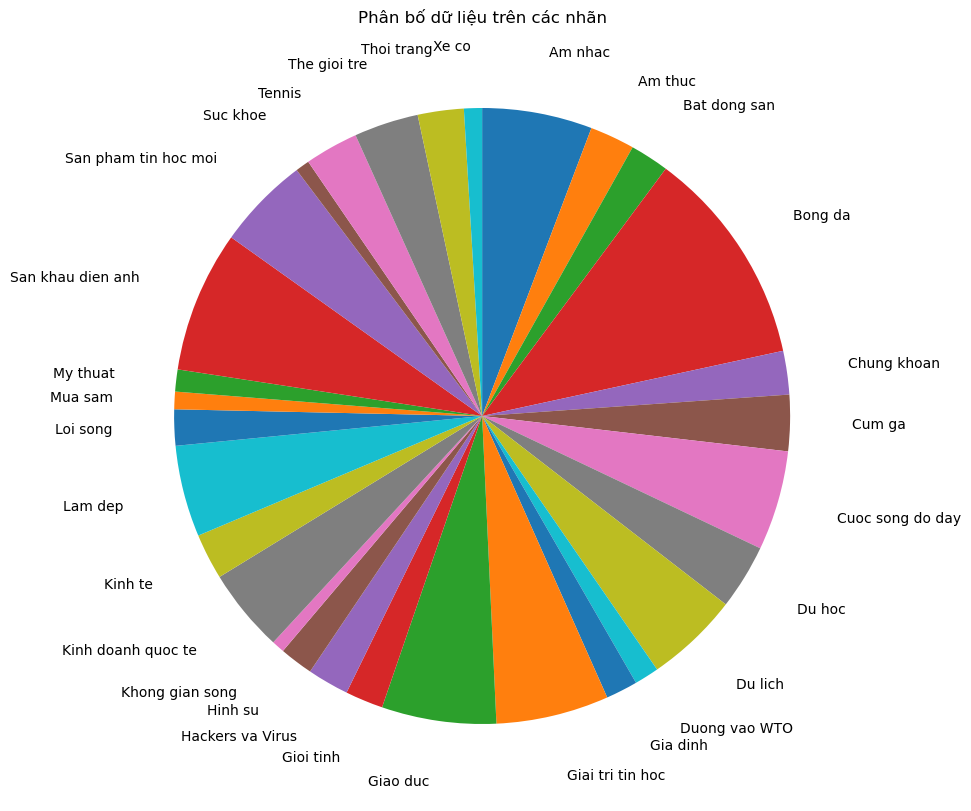

In [10]:
# kích thước của mỗi nhãn
sizes = []
np_train_y = np.array(train_y)
for label in labels:
    sizes.append(np_train_y[np.where(np_train_y == label)].shape[0])
    
S = sum(sizes)
sizes = [s/S for s in sizes]
plt.figure(figsize=(10, 10))
plt.title('Phân bố dữ liệu trên các nhãn')
plt.pie(sizes, labels=labels, startangle=90, counterclock=False, labeldistance=1.2)
plt.savefig('image/label_distribution.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

**Nhận xét:** Có nhiều nhãn có kích thước rất bé như *Am thuc* , *Bat dong san*, trong khi có nhiều nhãn có kích thước lớn như *Bong da*, *San khau dien anh*, ... Điều này đòi hỏi phải chia tập train và valid cho phù hợp.

### Độ phổ biến của các từ trong một nhãn

Ví dụ với nhãn Am nhac, ta có thể đánh giá được sơ bộ phân phối của các từ trong một nhãn.

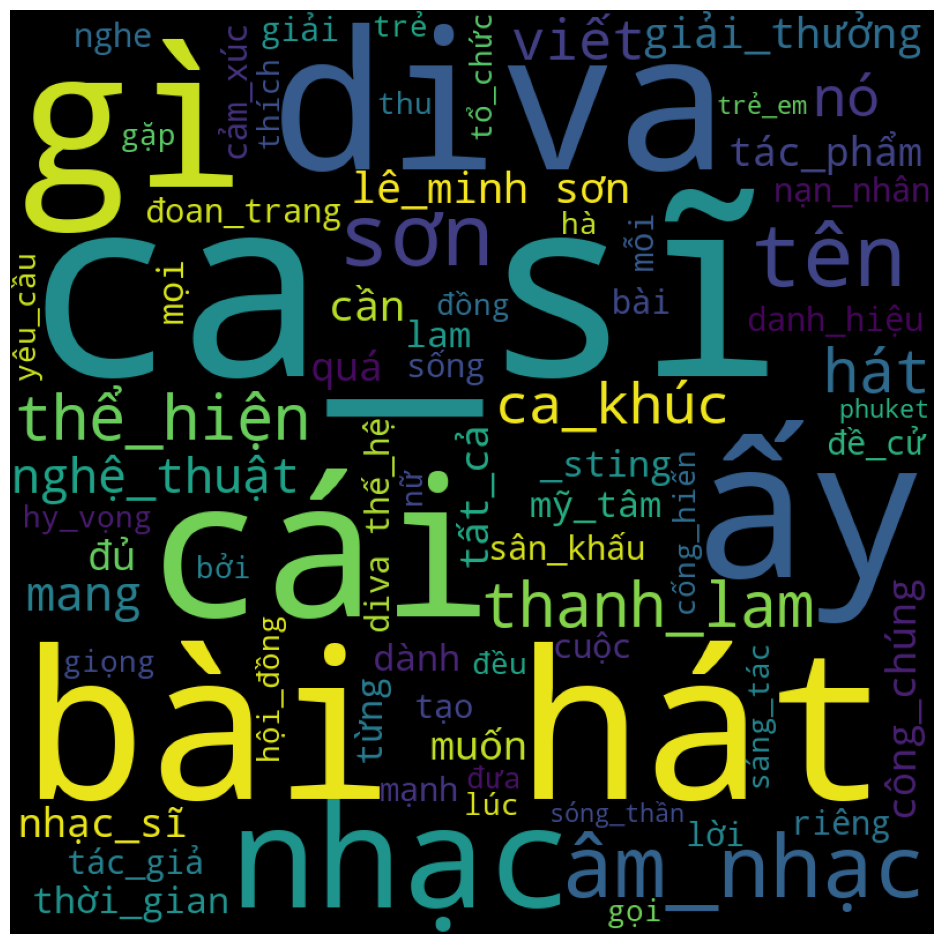

In [26]:
# Vẽ biểu đồ Word cloud cho label Am nhac
np_train_x = np.array(train_x)
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 'Am nhac')]))

fig = plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('image/word_distribution_Am_nhac.png',facecolor='whitesmoke', bbox_inches='tight')
plt.show()

Ví dụ với nhãn Bong da

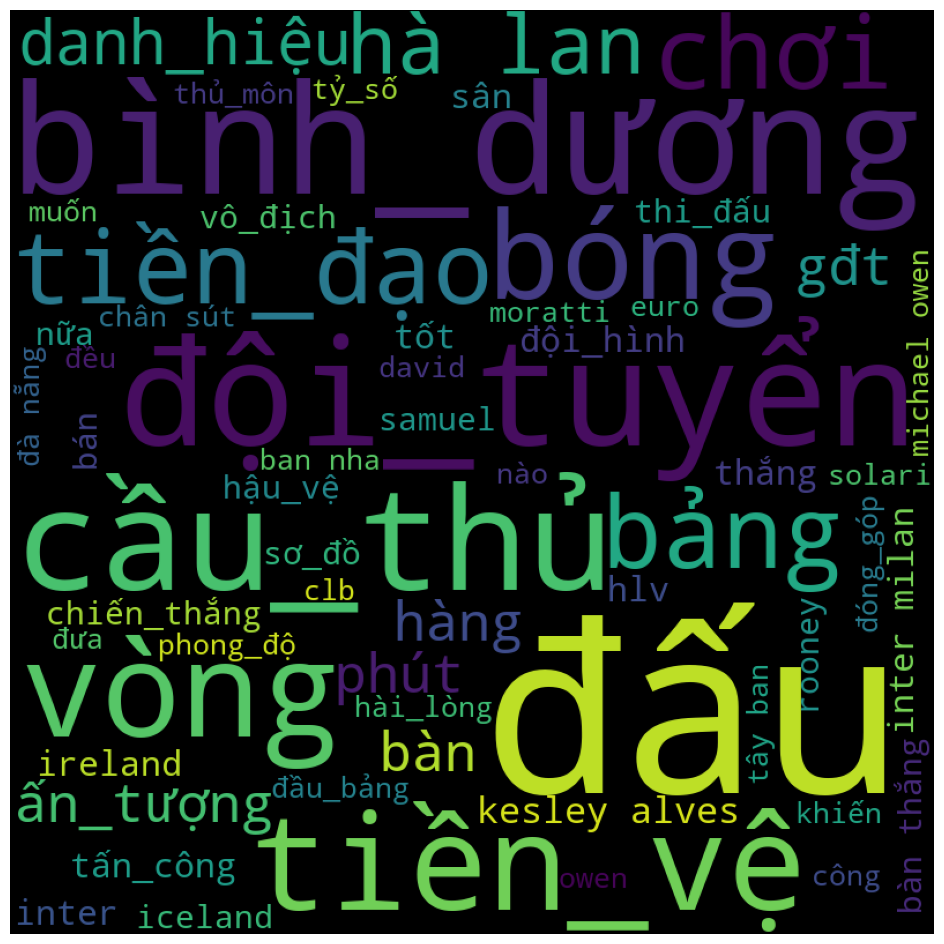

In [12]:
# Vẽ biểu đồ Word cloud cho label Bong da
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 'Bong da')]))

fig = plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('image/word_distribution_Bong_da.png',facecolor='whitesmoke', bbox_inches='tight')
plt.show()

Ví dụ nhãn Lam dep

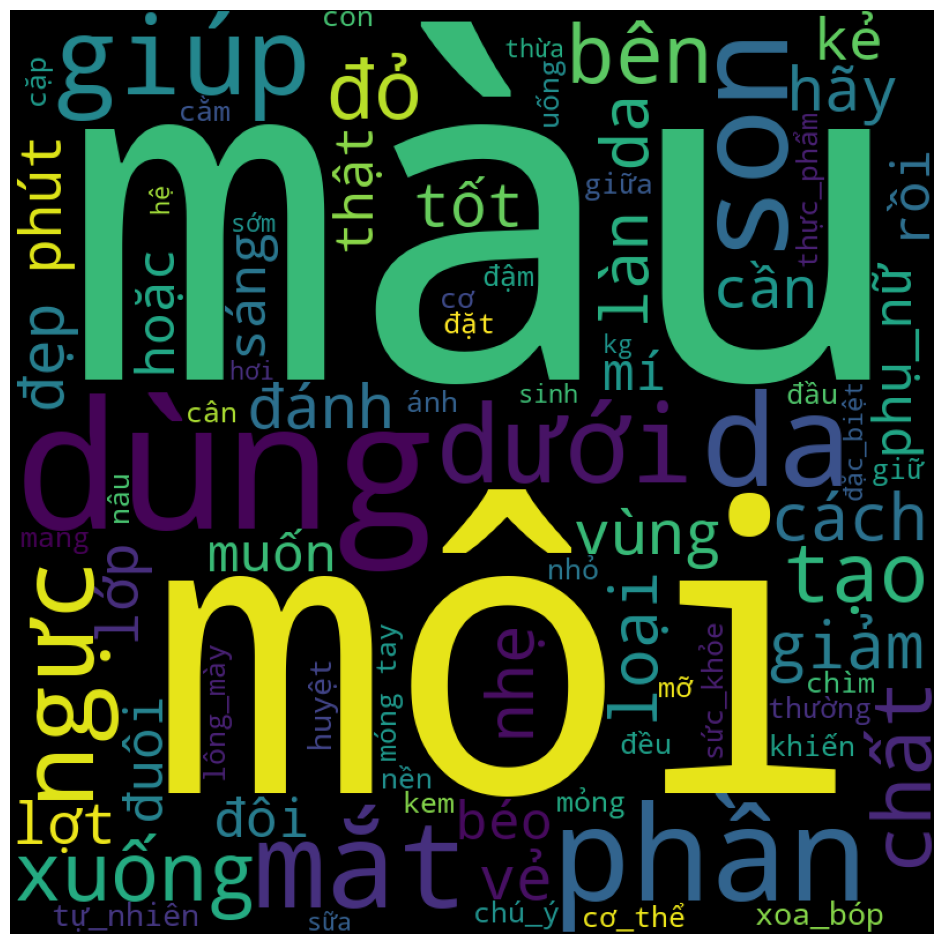

In [29]:
# Vẽ biểu đồ Word cloud cho label Lam dep
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 'Lam dep')]))

fig = plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('image/word_distribution_Lam_dep.png',facecolor='whitesmoke', bbox_inches='tight')
plt.show()

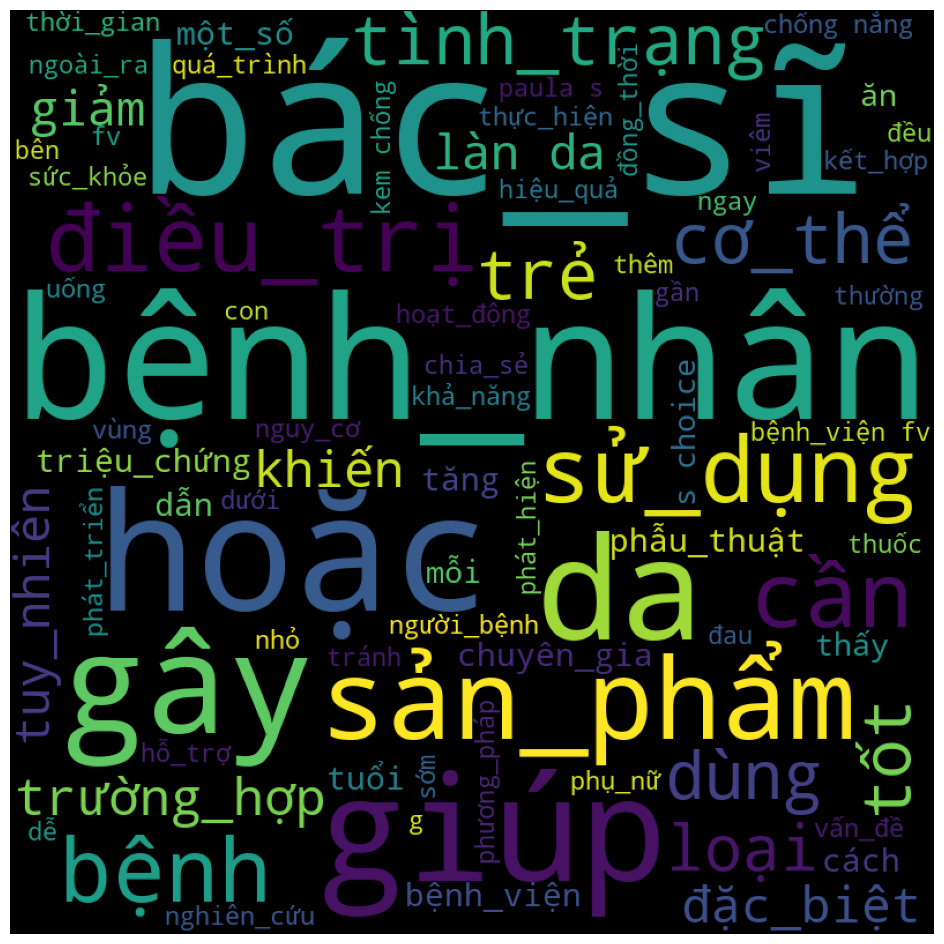

In [31]:
# Vẽ biểu đồ Word cloud cho label Suc khoe
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 'Suc khoe')]))

fig = plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('image/word_distribution_Suc_khoe.png',facecolor='whitesmoke', bbox_inches='tight')
plt.show()

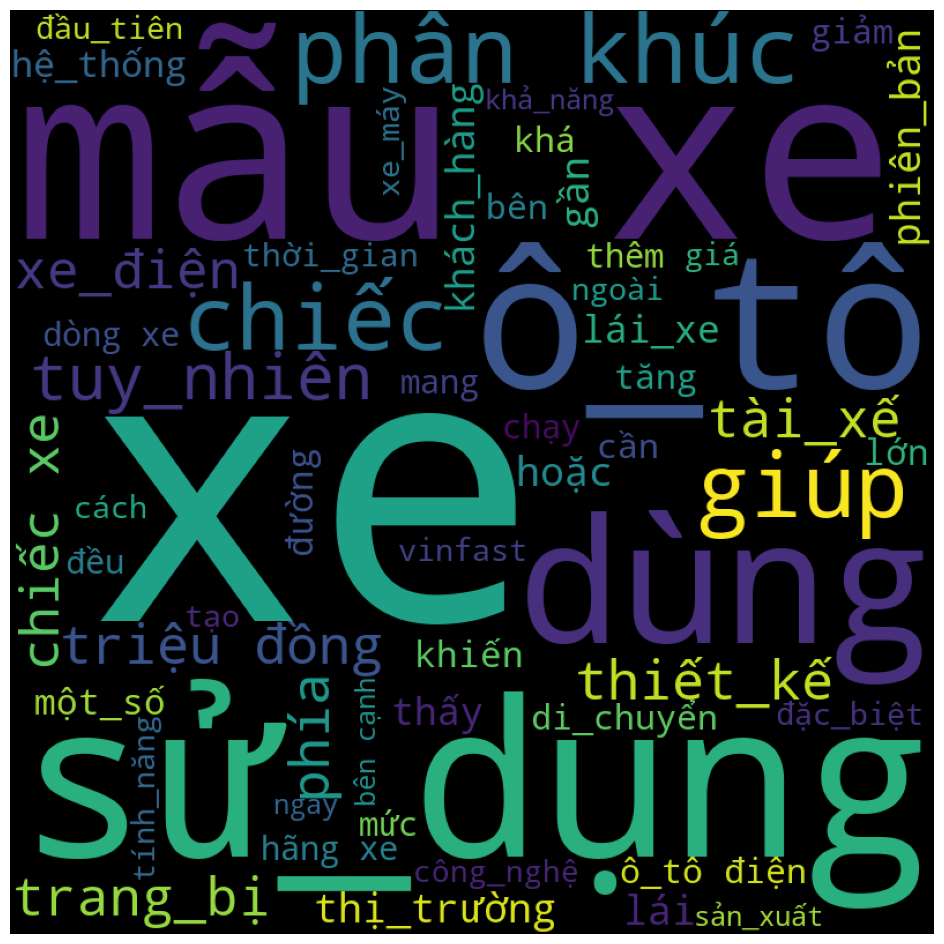

In [32]:
# Vẽ biểu đồ Word cloud cho label Xe co
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 'Xe co')]))

fig = plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('image/word_distribution_Xe_co.png',facecolor='whitesmoke', bbox_inches='tight')
plt.show()

**Nhận xét:** Ta nhận thấy rằng những tin tức thuộc nhãn Am nhac có tần suất xuất hiện nhiều các từ như ca_sĩ, bài_hát, ca_khúc ...

Nhãn Bong da có những từ xuất hiện nhiều như cầu_thủ, thắng, bóng_đá, ...

Nhãn Lam dep có những từ xuất hiện nhiều như tóc, da, cơ_thể, ...

Đó là những từ liên quan trực tiếp tới những lĩnh vực này. Vì vậy, ta hoàn toàn có thể sử dụng tần số xuất hiện của mỗi từ để phân loại xem văn bản đó thuộc nhãn nào.